# Исследование компьютерных игр

Нам предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Выполнять наше исследование будем в следующем порядке:

1. Подробно изучим файл с данными
2. Обработаем пропуски и сделаем проверку типов данных
3. Проведем исследовательский анализ данных
4. Проведем исследовательский анализ данных
5. Проверим гипотезы
6. Сделаем конечный вывод

# <a id="begin">Оглавление:

1. [Открытие данных](#start)
2. [Подготовка данных](#preprocessing)
    * [Замена пропусков](#null)
    * [Замена типов данных](#change)
    * [Глобальные продажи](#incom)
3.  [Анализ данных](#research)
    * [Продажи игр по платформам](#platfoms)
    * [Влияние отзывов на продажи](#score)
    * [Влияние жанра на продажи]( #genre)
4. [Портрет пользователя каждого региона](#portrait)
    * [Рынок Северной Америки](#na)
    * [Рынок Европы](#eu)
    * [Рынок Японии](#jp)
5. [Проверка гипотез](#hypothes)
6. [Общий вывод](#finish)

# <a id="start">1. Открытие данных и изучение общей информации

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats as st
import pylab

In [2]:
#чтение файла и вывод общей информации
games = pd.read_csv('/datasets/games.csv')
games.info()
games.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9657,Crush3D,3DS,2012.0,Platform,0.07,0.04,0.00,0.01,71.0,7.4,E10+
2742,Final Fantasy XIV: A Realm Reborn,PS4,2014.0,Role-Playing,0.33,0.23,0.08,0.11,NaN,NaN,NaN
11430,One Piece: Romance Dawn - Bouken no Yoake,3DS,2013.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8744,Wolfenstein: The Old Blood,XOne,2015.0,Action,0.07,0.07,0.00,0.01,75.0,8,NaN
10012,SingStar Latino,PS3,2009.0,Misc,0.11,0.00,0.00,0.01,NaN,tbd,T


Интерпретация столбцов в таблице:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В данных есть пропуски, больше всего в колонках оценки критиков и пользователей, рейтинге. Приятно видеть, что в данных опродаже в разных регионах у нас полные данные, но, к сожалению, они указаны в миллионы проданных копий, поэтому первые значения которые мы видим очень небольшие и есть 0.00.
Нужно будет изменить тип данных в колонке года и оценке пользователей.

In [3]:
#проверка на дубликаты
games.duplicated().sum()

0

# <a id="preprocessing">2. Подготовка данных
[в начало](#begin)

На данном этапе нам нужно:
* заменить названия столбцов (приведите к нижнему регистру);
* обработать пропуски;
* обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом, решить, как его обработать;
* преобразовать данные в нужные типы;
* посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [4]:
#замена названия столбцов
games.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 
                 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score', 'rating'] 

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
year            16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### <a id="null">Замена пропусков

In [6]:
#процент пропусков
round(games.isna().mean()*100, 2)

name             0.01
platform         0.00
year             1.61
genre            0.01
na_sales         0.00
eu_sales         0.00
jp_sales         0.00
other_sales      0.00
critic_score    51.32
user_score      40.09
rating          40.48
dtype: float64

Удаляем пропуски в колонках 'name', 'genre' и year. Наша потеря дынных 1,61%

In [7]:
games.dropna(subset=['name', 'genre', 'year'],inplace=True)

В описании проекта, мы видим 'tbd' в столбцах с рейтингом. Можно предположить, что это сокращение от "to be determined" (будет определено). Будем считать что для данных игр рейтинг пока не известен. Данные в таких столбцах заменим на 0.
Также отмечаем, что в этом столбце у нас много пропущенных значений. Возможно, нет единой системы сбора оценки пользователей с разных сайтов, либо игроки просто не ставят оценки или игра совсем новая и еще недостаточно достовенрных данных для формирования рейтинга пользователей. Чтобы не путать рельные нулевые оценки пользователей, пропуски в этом столбце заменим на 11, так как мы знаем, что максимальная оценка - 10.
Пропущенные значения в столбце рейтинга критиков и организации ESRB мы не можем заменить объективными значениями. Можно было бы предположить, что рейтинг критиков для разных консолей совпадает, но так ли это - не известно. Пропущенные значения в столбце ретинга критиков заменяем на максимальное плюс единица (101), в столбце рейтинга ESRB заменим нулями. Рейтинга ESRB обозначается буквенными сокращениями, поэтому нули нам будет том легко отбросить при аналитике. 

In [8]:
#подсчет рейтинга со значением tbd
games.loc[games.loc[:,'user_score']== 'tbd']['user_score'].count()

2376

In [9]:
#Замена пропусков
games['user_score'] = games['user_score'].fillna(11)
games['critic_score'] = games['critic_score'].fillna(101)
games['rating'] = games['rating'].fillna('unknown')

### <a id="change">Замена типов данных
Меняем данные в столбце года выхода на целочисленный и в оценке пользователей.

In [10]:
#изменяем типы данных для года
games['year'] = games['year'].astype('int')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

#проверка на пропуски и их заммена после изменения типа данных
games['user_score'] = games['user_score'].fillna(11) 

### <a id="incom">Глобальные продажи

Проведем расчет суммарных продаж во всех регионах и запишем их в отдельный столбец

In [11]:
#общие продажи
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    16444 non-null float64
user_score      16444 non-null float64
rating          16444 non-null object
total_sales     16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод
На данном этапе мы избавились от пропусков, привели данные к правильным типам и добавили столбец суммарных продаж.

# <a id="research">3. Исследовательский анализ данных
[в начало](#begin)

На данном этапе нам необходимо будет ответить на следующие вопросы: 

* Сколько игр выпускалось в разные годы
* Как менялись продажи по платформам
* Какой период продаж можно назвать актуальным
* Какие платформы лидируют по продажам, растут или падают
* Какие жанры самые прибыльные

### <a id="platforms">Продажи игр по платформам

Выполняем расчет сколько игр выпускалось в разные годы. Создадим сводную таблиу и построим гистограмму.

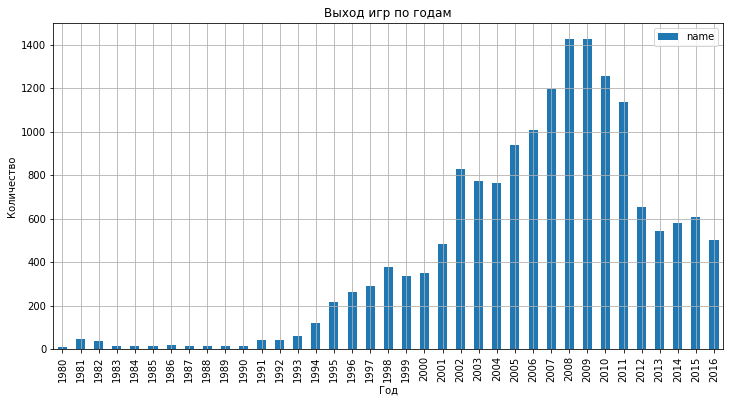

In [13]:
#сводная таблица игр по годам
games_per_year = (games
                  .pivot_table(index='year', values='name', aggfunc='count')
                  .plot(y='name', kind='bar', grid=True, figsize=(12, 6))
                 )
plt.title("Выход игр по годам") 
plt.xlabel("Год")
plt.ylabel("Количество") 
plt.show()

Больше всего игр выходило в 2008 и в 2009 годах. Начиная с 1999-2000 мы наблюдаем устойчивый рост. Для дальнейших расчетов актуальный временной интервал определим с 2000 по 2016 г.

Определяем наиболее популярные платформы. Для этого построим сводную таблицу и столбчатую диаграмму.

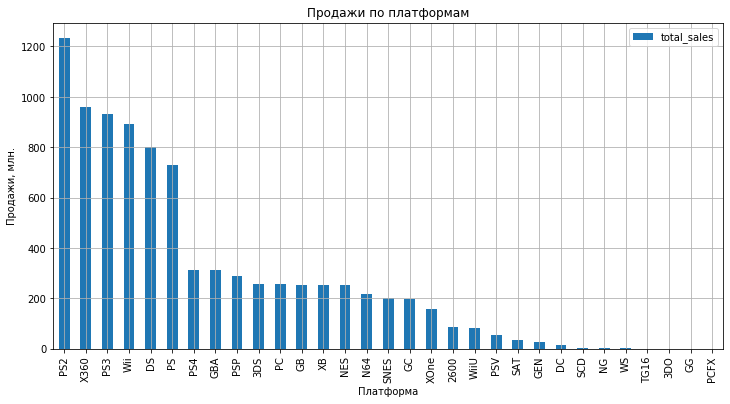

In [14]:
sales_per_platform = (games
                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by = 'total_sales', ascending = False)
                      .plot(y='total_sales', kind='bar', grid=True, figsize=(12, 6))
                 )
plt.title("Продажи по платформам") 
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн.") 
plt.show()

Исходя из диаграммы мы видим, что что наибольшей популярностью пользуются 6 платформ: PS2, X360, Wii, PS3, DS, PS. Построим их распределение по годам.

In [15]:
#Создаем список топ-платформ
top_platform = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']
#делаем по ним срез
top_platform_sales = games.query('platform in @top_platform')

In [16]:
#Сводная таблица по продажам топ-платформ
top_per_year = (
    top_platform_sales.query('year >= 2000')
    .pivot_table(index=['platform','year'], values='total_sales', aggfunc='sum')
)
top_per_year = top_per_year.reset_index()
top_per_year.head()   


,platform,year,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31


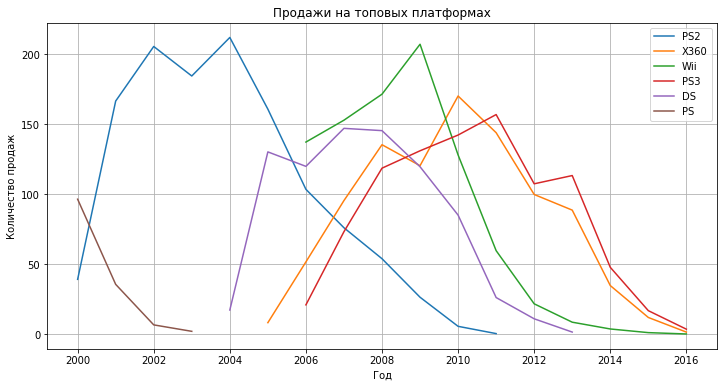

In [17]:
#Выделим каждую топ-платформу отдельно
x_1 = top_per_year.query('platform == "PS2"')
x_2 = top_per_year.query('platform == "X360"')
x_3 = top_per_year.query('platform == "Wii"')
x_4 = top_per_year.query('platform == "PS3"')
x_5 = top_per_year.query('platform == "DS"')
x_6 = top_per_year.query('platform == "PS"')

#строим график
plt.figure(figsize = (12,6))
plt.plot(x_1['year'], x_1['total_sales'], label= "PS2")
plt.plot(x_2['year'], x_2['total_sales'], label= "X360")
plt.plot(x_3['year'], x_3['total_sales'], label= "Wii")
plt.plot(x_4['year'], x_4['total_sales'], label= "PS3")
plt.plot(x_5['year'], x_5['total_sales'], label= "DS")
plt.plot(x_6['year'], x_6['total_sales'], label= "PS")
plt.title("Продажи на топовых платформах")
plt.xlabel("Год")
plt.ylabel("Количество продаж") 
plt.legend()
plt.grid()
plt.show()

Продажи по всем платформам падают в нашем актуальном периоде. PS и PS2 утратили свою актуальность еще до середины рассматриваемого временного интервала. Можно отметить, что продажи по топ-платформам растут первые 3-5 лет и примерно столько же времени мы наблюдаем снижение продаж.Это говорит нам о том, что на рынке консолей высокая конкуренция и компании выпускаю все новые и более совершенные платформы.
Исходя из этих данных, для построения прогнозов на 2017 год **актуальным периодом для нас будет с 2012 по 2016** (2017 минус 5 лет).

Так как ранее мы опредили для себя актуальный период с 2012 года, посмотрим продажи по всем платформам с этого периода.

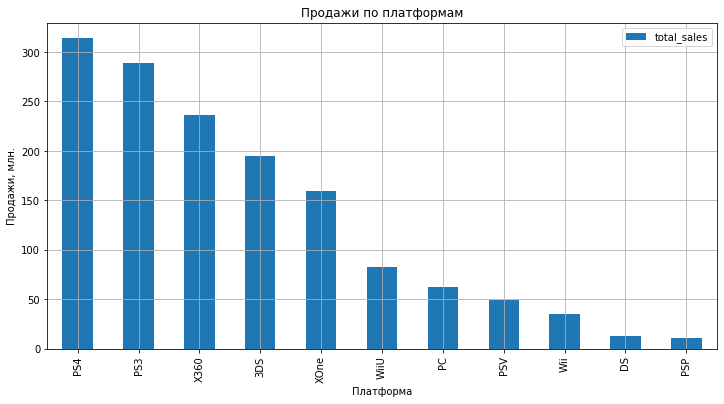

In [18]:
actual_games = games.query('year >= 2012')                     
                                            
(
    actual_games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales', ascending = False)
    .plot(y='total_sales', kind='bar', grid=True, figsize=(12, 6))
)
plt.title("Продажи по платформам") 
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн.") 
plt.show()

В актуальном периоде у нас лидирует по продажам PS4, PS3 идет на втором месте и на третьем X360. Постороим график «ящик с усами» по глобальным продажам игр для трех платформ - PS4, PS3, X360.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


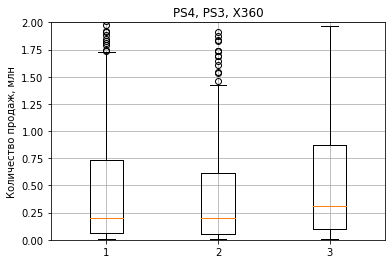

In [19]:
#выделяем платформы в отдельные датасеты
PS4 = actual_games.query('platform == "PS4"')
PS3 = actual_games.query('platform == "PS3"')
X360 = actual_games.query('platform == "X360"')

#выводим боксплоты на одном графике
data = [PS4['total_sales'], PS3['total_sales'], X360['total_sales']]
fig7, ax7 = plt.subplots()
ax7.boxplot(data)
#ограничим ось у от экстремальных значений
plt.ylim(0, 2)
plt.title('PS4, PS3, X360')
plt.ylabel('Количество продаж, млн')
plt.grid()
plt.show()

Для платформ PS4 и PS3 медианное значение продаж находится на уровне 0,17 млн. копий, но у PS3 граница третьего квантиля находдится немного ниже. Боксплот X360 имеет больший размах и медианное значение находится на уровне 0,28 млн. копий

## <a id="score">Влияние отзывов на продажи
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитам корреляцию между отзывами и продажами. У платформы PS4 самые высокие продажи за период с 2012 года, будем анализировать именно ее.  

Ранее пропущенных значения в столбцах оценок мы заменяли максимальными плюс единица, сейчас нам нужно их исключить из статистики. Диаграмммы рассеивания по оценкам пользователей будут зелеными, для оценок критиков - синие.

In [20]:
#срез только по реальным оценкам
PS4_per_score = PS4.query('user_score<=10 and critic_score<=100')

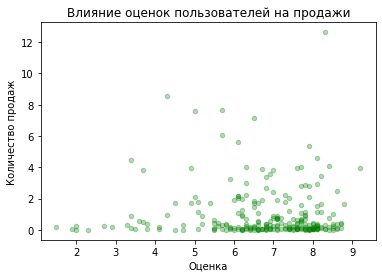

In [21]:
PS4_per_score.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, color = 'green') 
plt.title('Влияние оценок пользователей на продажи')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж')
plt.show()

In [22]:
PS4_per_score['total_sales'].corr(PS4_per_score['user_score'])

-0.03362497596528878

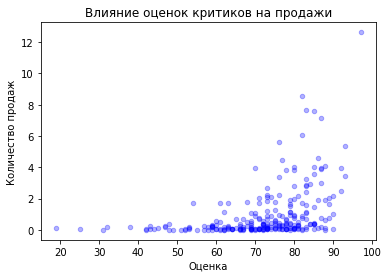

In [23]:
PS4_per_score.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, color = 'blue') 
plt.title('Влияние оценок критиков на продажи')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж')
plt.show()
plt.show()

In [24]:
PS4_per_score['total_sales'].corr(PS4_per_score['critic_score'])

0.40589480145836687

Коэффициент корреляции Пирсона для оценок критиков выше, чем для оценок пользователей

Соотнесем выводы с продажами игр на других платформах. Для этого постоим диаграммы рассеивания по всей актуальной выборке

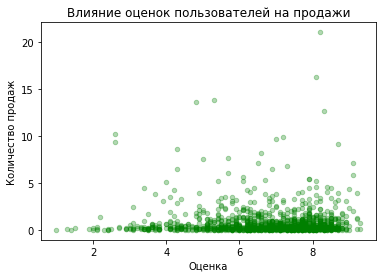

In [25]:
games_per_score = actual_games.query('user_score<=10 and critic_score<=100')
games_per_score.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, color = 'green') 
plt.title('Влияние оценок пользователей на продажи')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж')
plt.show()
plt.show()

In [26]:
games_per_score['total_sales'].corr(games_per_score['user_score'])

0.0005966665040503057

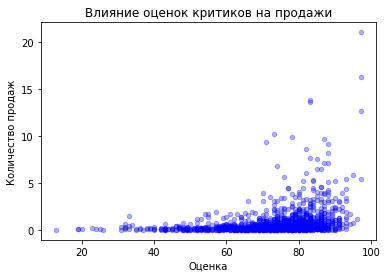

In [27]:
games_per_score.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, color = 'blue') 
plt.title('Влияние оценок критиков на продажи')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж')
plt.show()
plt.show()

In [28]:
games_per_score['total_sales'].corr(games_per_score['critic_score'])

0.30651579412925023

Отмечаем, что как по отдельно выделенной платформе PS4, так и по всей выборке коэффициент корреляции зависимости глобальных продаж от оценок пользователей низкий, для оценок критиков он выше и находится на уровне 0,4 и 0,3 соответственно. Данные значения все равно далеки от единицы, что говорит нам о наличии связи, однако не слишком сильной. Выходит, оценка критиков влияет на продажи, но так бывает не всегда.

## <a id="genre">Влияние жанра на продажи

Посмотрим на общее распределение игр по жанрам. Опредлим какие жанры самые прибыльные. Выделим жанры с высокими и низкими продажами.

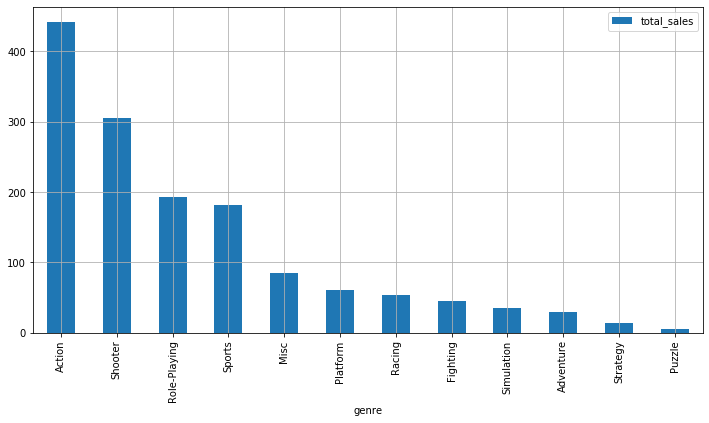

In [29]:
#график популярности игр с 2012 года
(
    actual_games
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales', ascending = False)
    .plot(y='total_sales', kind='bar', grid=True, figsize=(12, 6))
)
plt.show()

In [30]:
#точное значение продаж по топ3 в жанрах
(actual_games
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales', ascending = False)
    .head(3)
)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80


# Вывод
На данном мы сделали расчет и построили график кличества игра выпускаемых по годам. Исходя из этого графика мы определили, что количество выпускаемых игр сильно выросло с 2000 года. Далее мы изучили как менялись продажи по платформам и определили топ-6 платформ, это PS2, X360, Wii, PS3, DS, PS. Исходя из графика продаж по этим платформам мы сделали вывод, что продажи по топ-платформам растут первые 3-5 лет и примерно столько же времени мы наблюдаем снижение продаж. Это говорит нам о том, что на рынке консолей высокая конкуренция и компании выпускаю все новые и более совершенные платформы. Для построения прогнозов на 2017 год актуальным периодом для нас мы определили с 2012 по 2016.

Далее мы постороили график продаж с 2012 года и определили наиболее прибыльные платформы в этом периоде, ими стали - PS4, PS3, X360.  После этого мы построили графики корреляции оценок пользователей и критиков на продажи  и можем сказать, что для оценок критиков коэффициент корреляции Пирсона выше и равен 0,3 по всей выборке. Данное значение все равно далеко от единицы, что говорит нам о наличии связи, однако не слишком сильной. Выходит, оценка критиков влияет на продажи, но так бывает не всегда. Видимо пользователи руководствуются чем-то другим при выборе игр.

После этого мы посмотрели как распределены глобальные продажи по жанрам игр. Самые популярные жанры - Action (389.98 млн.), Shooter	(267.47 млн.) и Role-Playing (177.97 млн.). Наименьшей популярностью пользуются - Adventure, Strategy, Puzzle.

#  <a id="portrait">4. Портрет пользователя каждого региона
[в начало](#begin)

Далее мы будем определять портрет пользователя каждого региона (NA, EU, JP). Для этого выделим:
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

### <a id="na">Рынок Северной Америки

In [31]:
# Срез по рынку NA
games_NA = games.query('year >= 2012 and na_sales > 0')   

In [32]:
#функция для графиков
def rating_top5(df, values, index):
    df = df
    
    plt.figure(figsize=(12,6))
    plt.bar(df[index], df[values])
    for i, val in enumerate(df[values].values):
        (
        plt.text(i, val, round(float(val), 2), horizontalalignment='center', verticalalignment='bottom', 
                 fontdict={'fontweight':500, 'size':12})
        )    
    plt.title('Рейтинг ' + index + ' в ' + values) 
    plt.xlabel(index)
    plt.ylabel("Продажи, млн.") 
    plt.show()

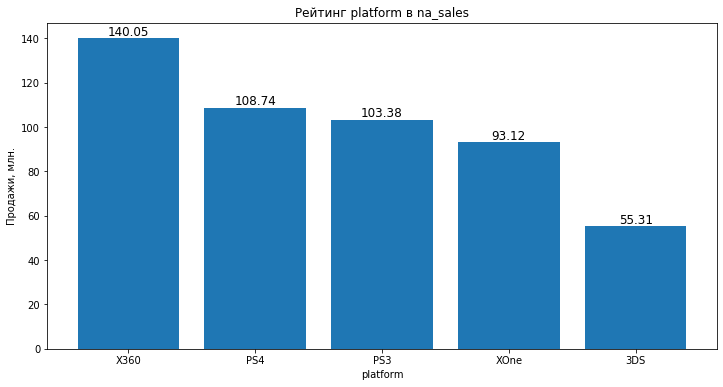

In [33]:
#сводная таблица по платформам
games_NA_platform = (
    games_NA.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'na_sales', ascending = False)
)

#Строим график
rating_top5(games_NA_platform[:5], 'na_sales', 'platform')

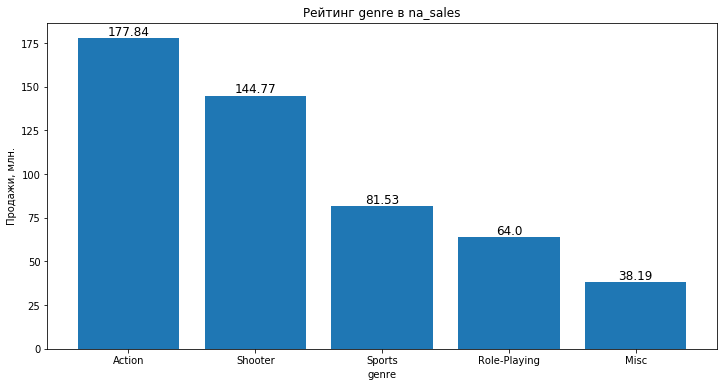

In [34]:
#сводная таблица по жанрам
games_NA_genre = (
    games_NA.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'na_sales', ascending = False)
)

#Строим график
rating_top5(games_NA_genre[:5], 'na_sales', 'genre')

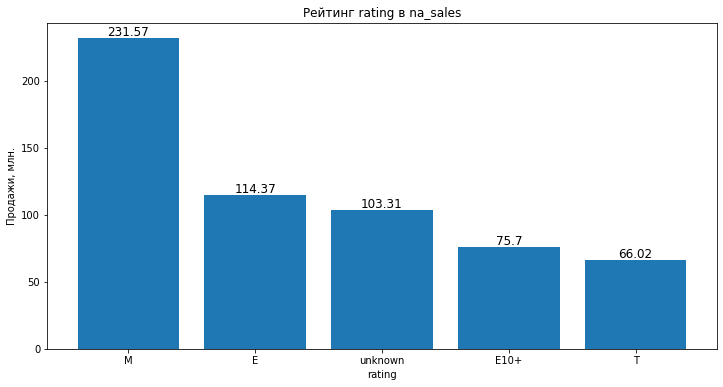

In [35]:
#влияние рейтинга ESRB
games_NA_ESRB = (
    games_NA
    .pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'na_sales', ascending = False)
)

#Строим график
rating_top5(games_NA_ESRB[:5], 'na_sales', 'rating')

На рынке Северной Америки продажи по топ-5 платформам распределены следующим образом:X360 - 140.05 млн., PS4 - 108.74 млн., PS3 - 103.38 млн., XOne - 93.12 млн. и 3DS - 55.31 млн.
Самые популярные жанры здесь - Action, Shooter, Sports, Role-Playing и Misc.
В лидерах продаж здесь игры категории М рейтинга ESRB (для взрослых старше 17 лет), на втором месте - Е (для всех от 6 лет и старше). Наименьшая популярность у игр категории Т (подросткам от 13 лет и старше). 

### <a id="eu">Рынок Европы

In [36]:
# Срез по рынку EU
games_EU = games.query('year >= 2012 and eu_sales > 0')   

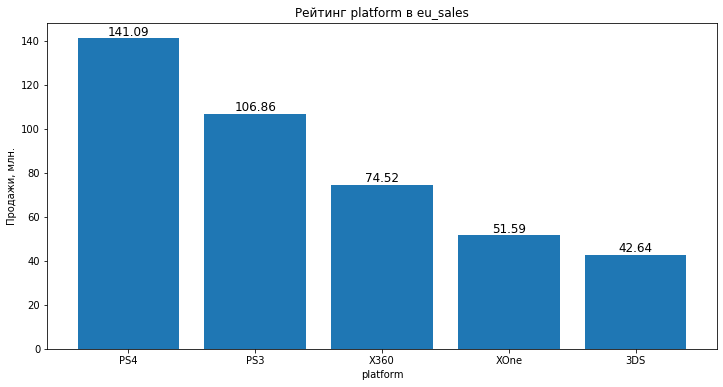

In [37]:
#сводная таблица по платформам
games_EU_platform = (
    games_EU.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'eu_sales', ascending = False)
)

#Строим график
rating_top5(games_EU_platform[:5], 'eu_sales', 'platform')

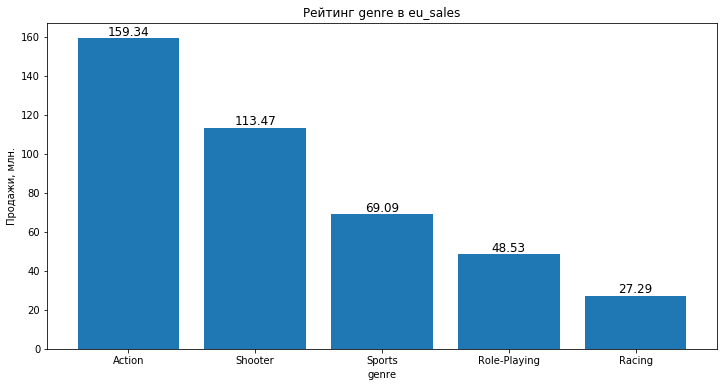

In [38]:
#сводная таблица по жанрам
games_EU_genre = (
    games_EU.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'eu_sales', ascending = False)
)

#Строим график
rating_top5(games_EU_genre[:5], 'eu_sales', 'genre')

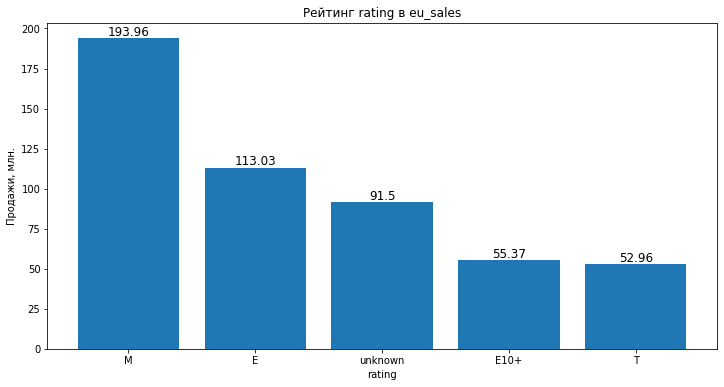

In [39]:
#влияние рейтинга ESRB
games_EU_ESRB = (
    games_EU
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'eu_sales', ascending = False)
)

#Строим график
rating_top5(games_EU_ESRB[:5], 'eu_sales', 'rating')

На рынке Европы продажи по топ-5 платформам распределены следующим образом:PS4 - 141.09 млн., PS3 - 106.86 млн., X360 - 74.52 млн., XOne - 51.59 млн. и 3DS - 42.64 млн.
Самые популярные жанры здесь - Action, Shooter, Sports, Role-Playing и Racing.
В лидерах продаж здесь игры категории М рейтинга ESRB (для взрослых старше 17 лет), на втором месте - Е (для всех от 6 лет и старше). Наименьшая популярность у игр категории Т (подросткам от 13 лет и старше). 

### <a id="jp">Рынок Японии

In [40]:
# Срез по рынку JP
games_JP = games.query('year >= 2012 and jp_sales > 0')   

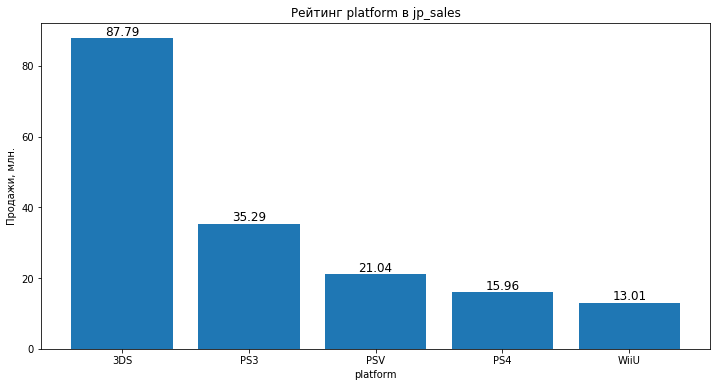

In [41]:
#сводная таблица по платформам
games_JP_platform = (
    games_JP.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'jp_sales', ascending = False)
)

#Строим график
rating_top5(games_JP_platform[:5], 'jp_sales', 'platform')

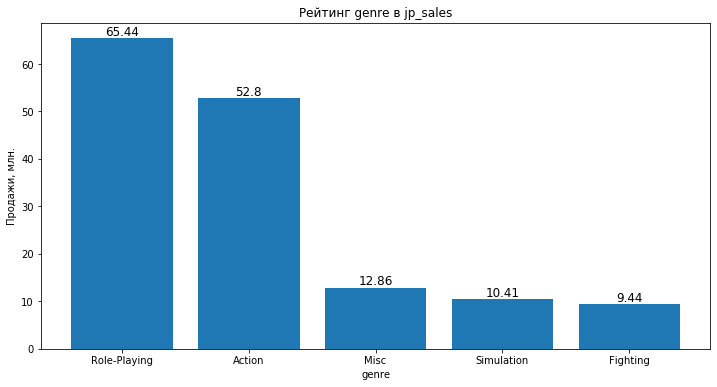

In [42]:
#сводная таблица по жанрам
games_JP_genre = (
    games_JP.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'jp_sales', ascending = False)
)

#Строим график
rating_top5(games_JP_genre[:5], 'jp_sales', 'genre')


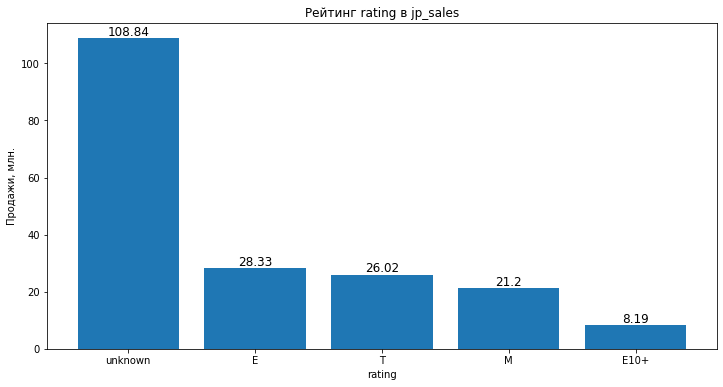

In [43]:
#влияние рейтинга ESRB
games_JP_ESRB = (
    games_JP
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
    .sort_values(by = 'jp_sales', ascending = False)
)

#Строим график
rating_top5(games_JP_ESRB[:5], 'jp_sales', 'rating')

На рынке Японии продажи по топ-5 платформам распределены следующим образом:3DS - 87.79 млн., PS3 - 35.29 млн., PSV - 21.04 млн., PS4 - 15.96 млн. и WiiU - 13.01 млн.
Самые популярные жанры здесь - Role-Playing, Action, Misc, Simulation и Fighting.
В лидерах продаж здесь игры неизвестной категории по рейтингу ESRB, меньшей популярностью пользуются игры категории E10+(для всех от 10 лет и старше). 

## Вывод
Рынки Северной Америки и Европы имеют схожие тенденции: так здесь популярны одни и те же платформы: X360, PS4, PS3, XOne и 3DS, почти совпадают самые популярные жанры игр - Action, Shooter, Sports, Role-Playing. И наиболее покупаемые игра в этих регионах категории М рейтинга ESRB (для взрослых старше 17 лет).
Рынок Японии отличается от двух других. Так общие продажи игр в этом регионе пришлись на платформы 3DS, PS3, PSV, PS4 и WiiU.
Самые популярные жанры здесь - Role-Playing, Action, Misc, Simulation и Fighting. В лидерах продаж здесь игры неизвестной категории по рейтингу ESRB, меньшей популярностью пользуются игры категории E10+(для всех от 10 лет и старше). 

# <a id="hypothes">5. Проверка гипотез
[в начало](#begin)

Проверка статистических гипотез предполагает выбор между двумя альтернативными гипотезами: нулевой гипотезой Н0 и альтернативной Н1. p - это вероятность отвергнуть нулевую гипотезу при условии, что она верна. 
Если р < 0,05, (=0,05) то аргументов достаточно, чтобы отвергнуть нулевую гипотезу, хотя есть небольшой шанс против этого. Тогда можно отвергнуть нулевую гипотезу и сказать, что результаты значимы на 5% уровне. Напротив, если р > 0,05, то аргументов недостаточно, чтобы отвергнуть нулевую гипотезу. Не отвергая нулевую гипотезу, можно заявить, что результаты не значимы на 5% уровне. Данное заключение не означает, что нулевая гипотеза истинна, просто недостаточно аргументов (возможно, маленький объем выборки), чтобы ее отвергнуть. 

### Гипотеза 1 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Будем проверять гипотезу о равенстве средних двух генеральных совокупностей, для этого применим метод scipy.stats.ttest_ind.  
Нулевая гипотеза - средний пользовательский рейтинг платформы Xbox One **равен** среднему пользовательскому рейтингу PC.  
Альтернативная гипотеза - средний пользовательский рейтинг платформы Xbox One **отличается** от среднего пользовательского рейтинга PC.
Пороговое значение alpha - 0,05

In [44]:
#выделяем отдельно данные из общей выборки
df_xbox = games.query('year >= 2012 and platform == "XOne" and user_score<=10')
df_pc = games.query('year >= 2012 and platform == "PC" and user_score<=10')

# значения пользовательских рейтингов
df_xbox_score = df_xbox['user_score']
df_pc_score = df_pc['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# дисперсии выборок не равны
results = st.ttest_ind(df_xbox_score, df_pc_score, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [45]:
#средние текущих выборок
display(df_xbox['user_score'].mean())
display(df_pc['user_score'].mean())

6.521428571428572

6.4286407766990274

На основе статистического теста нам не получилось отвергнуть нулевую гипотезу. Считаем, что эмпирически полученные данные не противоречат нулевой гипотезе, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Полученное значение p-value говорит о том, что хотя средний рейтинг Xbox One и PC и неодинаков, с вероятностью в почти 54% такое или большее различие можно получить случайно.

### Гипотеза 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем проверять гипотезу о равенстве средних двух генеральных совокупностей, для этого применим метод scipy.stats.ttest_ind  
Нулевая гипотеза - средние пользовательские рейтинги жанров Action и  Sports **одинаковые**  
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и  Sports **разные**  
Пороговое значение alpha - 0,05

In [46]:
#выделяем отдельно данные из общей выборки
df_action = games.query('year >= 2012 and genre == "Action" and user_score<=10')
df_sports = games.query('year >= 2012 and genre == "Sports" and user_score<=10')

# значения пользовательских рейтингов
df_action_score = df_action['user_score']
df_sports_score = df_sports['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# дисперсии выборок не равны
results = st.ttest_ind(df_action_score, df_sports_score, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [47]:
#средние текущих выборок
display(df_action['user_score'].mean())
display(df_sports['user_score'].mean())

6.825047801147227

5.455897435897437

На основе проведенного статистического теста мы отвергаем нулевую гипотезу и с высокой долей вероятности можем сказать, что средние пользовательские рейтинги жанров Action и Sports различаются.  
Полученное значение p-value означает, что вероятность получить одинаковые средние по рейтингу этих двух жанров крайне маловероятна

# <a id="finish">6. Общий вывод 
[в начало](#begin)

Нам были предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Целью нашего исследования было выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В данных были пропуски, больше всего в колонках оценки критиков и пользователей, рейтинге. Были изменены типы данных в колонке года и оценке пользователей. На основе продаж по регионам мы добавили в таблицу данные о глобальных продажах.
Далее мы отметили, что больше всего игр выходило в 2008 и в 2009 годах. Начиная с 1999-2000 наблюдался устойчивый рост. Мы построили график продаж по платформам с 2000 года и увидели, что наибольшей популярностью пользовались 6 платформ: PS2, X360, Wii, PS3, DS, PS. На основе продаж по годам для этих 6 платформ мы сделали вывод, что продажи по топ-платформам растут первые 3-5 лет и примерно столько же времени мы наблюдаем снижение продаж. Это говорит нам о том, что на рынке игровых консолей высокая конкуренция и компании выпускаю все новые и более совершенные платформы. Для построения прогнозов на 2017 год актуальным периодом для нас мы определили с 2012 по 2016.
Далее мы построили график продаж с 2012 года и определили наиболее прибыльные платформы в этом периоде, ими стали - PS4, PS3, X360.  

После этого мы построили графики корреляции оценок пользователей и критиков на продажи  и можем сказать, что для оценок критиков коэффициент корреляции Пирсона выше и равен 0,3 по всей выборке. Данное значение все равно далеко от единицы, что говорит нам о наличии связи, однако не слишком сильной. Выходит, оценка критиков влияет на продажи, но так бывает не всегда. Видимо пользователи руководствуются чем-то другим при выборе игр.
После этого мы посмотрели как распределены глобальные продажи по жанрам игр. Самые популярные жанры - Action (389.98 млн.), Shooter (267.47 млн.) и Role-Playing (177.97 млн.). Наименьшей популярностью пользуются - Adventure, Strategy, Puzzle.
Детальный разбор продаж по регионам показал, что рынки Северной Америки и Европы имеют схожие тенденции, а рынок Японии отличается от двух других.

На рынке Северной Америки продажи по топ-5 платформам распределены следующим образом: X360 - 140.05 млн., PS4 - 108.74 млн., PS3 - 103.38 млн., XOne - 93.12 млн. и 3DS - 55.31 млн. Самые популярные жанры здесь - Action, Shooter, Sports, Role-Playing и Misc. В лидерах продаж игры категории М рейтинга ESRB (для взрослых старше 17 лет), на втором месте - Е (для всех от 6 лет и старше). Наименьшая популярность у игр категории Т (подросткам от 13 лет и старше). 
На рынке Европы продажи по топ-5 платформам распределены следующим образом:PS4 - 141.09 млн., PS3 - 106.86 млн., X360 - 74.52 млн., XOne - 51.59 млн. и 3DS - 42.64 млн. Самые популярные жанры здесь - Action, Shooter, Sports, Role-Playing и Racing. В лидерах продаж здесь игры категории М рейтинга ESRB (для взрослых старше 17 лет), на втором месте - Е (для всех от 6 лет и старше). Наименьшая популярность у игр категории Т (подросткам от 13 лет и старше).
На рынке Японии продажи по топ-5 платформам распределены следующим образом:3DS - 87.79 млн., PS3 - 35.29 млн., PSV - 21.04 млн., PS4 - 15.96 млн. и WiiU - 13.01 млн. Самые популярные жанры здесь - Role-Playing, Action, Misc, Simulation и Fighting. В лидерах продаж здесь игры неизвестной категории по рейтингу ESRB, меньшей популярностью пользуются игры категории E10+(для всех от 10 лет и старше).

Далее мы выполнили проверку двух гипотез. На основе статистического теста нам не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC разные. Можно сказать, что с высокой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC различаются. Вторую гипотезу, что средние пользовательские рейтинги жанров Action и  Sports одинаковые, мы отвергли, что  с высокой долей вероятности указывает нам на то что, что средние пользовательские рейтинги различаются.

На основе данного исследования мы можем рекомендовать в 2017 году для рынков Америки и Европы сделать ставку на игры жанров Action, Shooter, Sports, Role-Playing, разработанных для платформ X360, PS4, PS3, XOne и 3DS. Для Японского рынка обратить внимание на игры жанров Role-Playing, Action, Misc, Simulation и Fighting на платформах  3DS, PS3, PSV, PS4 и WiiU.
